# **Car price prediction using MLP regression with Tensorflow**





In [1]:
!pip install opendatasets

In [19]:
import opendatasets as od
import pandas as pd
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [3]:
dataset = "https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge"
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ckanwarit
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge


100%|██████████| 429k/429k [00:00<00:00, 63.7MB/s]

In [4]:
df = pd.read_csv('/content/car-price-prediction-challenge/car_price_prediction.csv')
df.sample(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
10205,45802887,44247,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,148633 km,4.0,Automatic,Front,04-May,Left wheel,White,4
7383,45629962,2666,382,FORD,Fusion,2015,Sedan,Yes,Hybrid,2,100747 km,4.0,Automatic,Front,04-May,Left wheel,Green,0
10291,45798518,12544,-,TOYOTA,Prius,2007,Hatchback,Yes,Petrol,1.5,0 km,4.0,Variator,Front,04-May,Left wheel,White,12
18395,45797065,5018,-,MERCEDES-BENZ,C 220,1996,Sedan,No,Diesel,2.2,136000 km,4.0,Manual,Rear,04-May,Left wheel,Blue,0
6996,45787925,33243,-,MITSUBISHI,L 200,2010,Pickup,No,Diesel,2.5 Turbo,280000 km,4.0,Manual,4x4,04-May,Left wheel,Green,2


In [5]:
df.shape

(19237, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [7]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


## 1. EDA

### What is the average price of each car manufacturer?

In [8]:
mean_price_per_manufacturer = df.groupby('Manufacturer')['Price'].mean().reset_index()
mean_price_per_manufacturer.columns = ['Manufacturer', 'Mean_Price']
mean_price_per_manufacturer = mean_price_per_manufacturer.sort_values(by='Mean_Price', ascending=False)

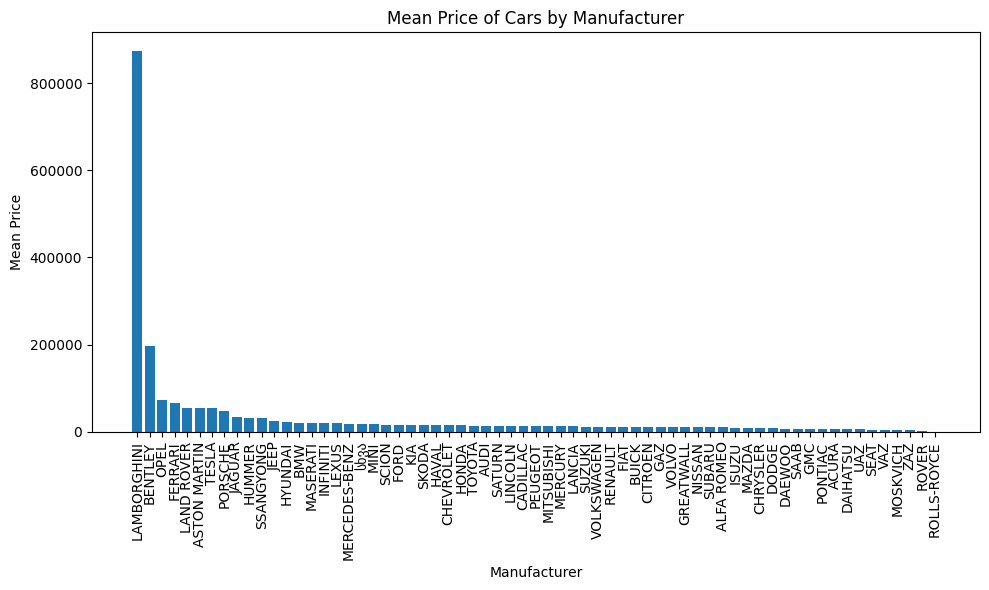

In [11]:
mean_price_per_manufacturer = df.groupby('Manufacturer')['Price'].mean().reset_index()

mean_price_per_manufacturer.columns = ['Manufacturer', 'Mean_Price']

mean_price_per_manufacturer = mean_price_per_manufacturer.sort_values(by='Mean_Price', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(mean_price_per_manufacturer['Manufacturer'], mean_price_per_manufacturer['Mean_Price'])
plt.xlabel('Manufacturer')
plt.ylabel('Mean Price')
plt.title('Mean Price of Cars by Manufacturer')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

*   As the figure shows, the significantly highest car pricein our data set is the Lamborghini.
*   which costs approximately 870000 usd or 31,633,200 Bath




### What is the average price for each year of production of a car?

In [26]:
mean_price_per_manufacturer = df.groupby('Prod. year')['Price'].mean().reset_index()
mean_price_per_manufacturer.columns = ['Prod. year', 'Mean_Price']
mean_price_per_manufacturer = mean_price_per_manufacturer.sort_values(by='Mean_Price', ascending=False)

overall_mean_price = mean_price_per_manufacturer['Mean_Price'].mean()

In [27]:
fig = px.bar(mean_price_per_manufacturer, x='Prod. year', y='Mean_Price',
             title='Mean Price per Production Year',
             labels={'Prod. year': 'Production Year', 'Mean_Price': 'Mean Price'},
             color='Mean_Price',
             color_continuous_scale=px.colors.sequential.Viridis)

fig.add_trace(go.Scatter(x=mean_price_per_manufacturer['Prod. year'],
                         y=[overall_mean_price]*len(mean_price_per_manufacturer),
                         mode='lines',
                         line=dict(color='red', dash='dash')))

fig.add_annotation(
    x=mean_price_per_manufacturer['Prod. year'].iloc[-1],
    y=overall_mean_price,
    text="Overall Mean Price",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40
)
fig.show()



*   There are some old cars that have high prices but were manufactured since 1990. Go up and you will find that the newer it is, the higher the price will be.
*   The average price of all cars in this dataset is 16630 USD.



### Does leather interior have a big effect on the price of the car?

In [39]:
leather_interior = df[df['Leather interior'] == "Yes"]
not_leather_interior  = df[df['Leather interior'] == "No"]
count_leather = len(leather_interior)
count_not_leather = len(not_leather_interior)
leather_interior_df = pd.DataFrame({
    'Leather Interior': ['Yes', 'No'],
    'Count': [count_leather, count_not_leather]
})

<ipython-input-49-6feb3773080f>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




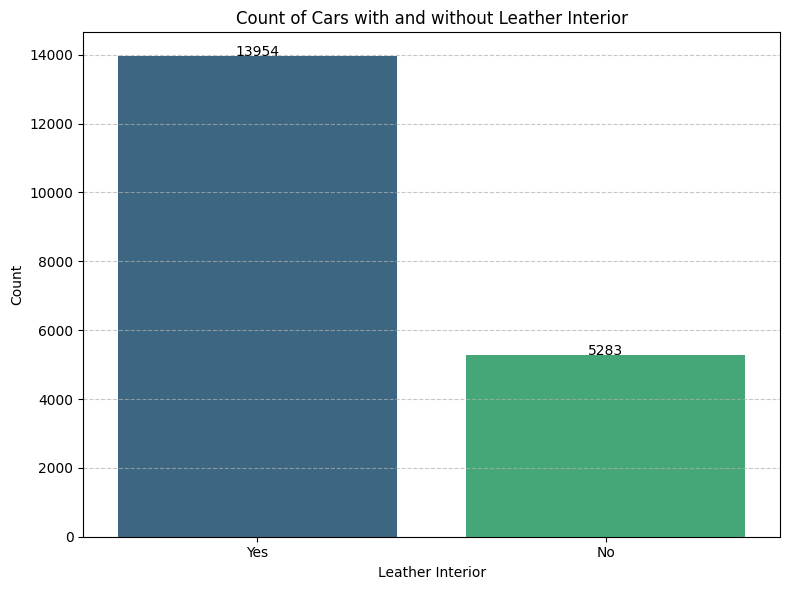

In [49]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Leather Interior', y='Count', data=leather_interior_df, palette='viridis')

for index, row in leather_interior_df.iterrows():
    plt.text(index, row['Count'], int(row['Count']), color='black', ha="center")

plt.xlabel('Leather Interior')
plt.ylabel('Count')
plt.title('Count of Cars with and without Leather Interior')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<ipython-input-56-156d35ddb081>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




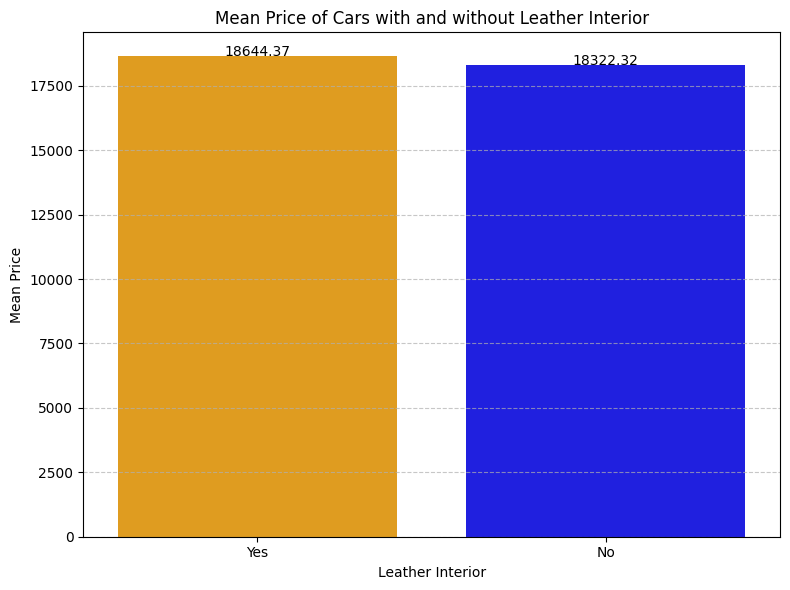

In [56]:
leather_interior_mean_price = leather_interior['Price'].mean()
not_leather_interior_mean_price = not_leather_interior['Price'].mean()
leather_interior_price_df = pd.DataFrame({
    'Leather Interior': ['Yes', 'No'],
    'Mean Price': [leather_interior_mean_price, not_leather_interior_mean_price]
})

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Leather Interior', y='Mean Price', data=leather_interior_price_df, palette=['orange', 'blue'])

for index, row in leather_interior_price_df.iterrows():
    plt.text(index, row['Mean Price'], f'{row["Mean Price"]:.2f}', color='black', ha="center")

plt.xlabel('Leather Interior')
plt.ylabel('Mean Price')
plt.title('Mean Price of Cars with and without Leather Interior')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



*   The number of cars with leather interiors is higher.
*   But the average price of both types of cars with leather interior and without leather interior are very close to each other.
